## Observations and Insights

In [3]:
%matplotlib inline

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
joined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')

joined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Dependencies and starter code

## Summary statistics

In [5]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Reduce data to relevant columns, group by drug regimen
reduced_data = joined_data[['Drug Regimen', 'Tumor Volume (mm3)']]
grouped_by_drug = reduced_data.groupby(["Drug Regimen"])

#Calculate summary stats
tumor_volume_mean = grouped_by_drug["Tumor Volume (mm3)"].mean()
tumor_volume_median = grouped_by_drug["Tumor Volume (mm3)"].median()
tumor_volume_variance = grouped_by_drug["Tumor Volume (mm3)"].var()
tumor_volume_stdev = grouped_by_drug["Tumor Volume (mm3)"].std()
tumor_volume_sem = grouped_by_drug["Tumor Volume (mm3)"].sem()

summary_stats_table = pd.DataFrame({"Tumor Volume Mean": tumor_volume_mean, "Tumor Volume Median": tumor_volume_median, "Tumor Volume Variance": tumor_volume_variance, "Tumor Volume Standard Dev.": tumor_volume_stdev, "Tumor Volume Standard Error of the Mean": tumor_volume_sem})

summary_stats_table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Dev.,Tumor Volume Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

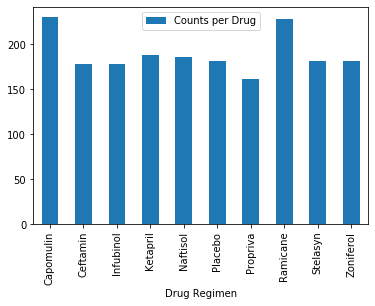

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts_per_drug = grouped_by_drug['Drug Regimen'].count()
drug_counts_df = pd.DataFrame({"Counts per Drug": counts_per_drug})
drug_counts_df.plot.bar(y = "Counts per Drug")

## Pie plots

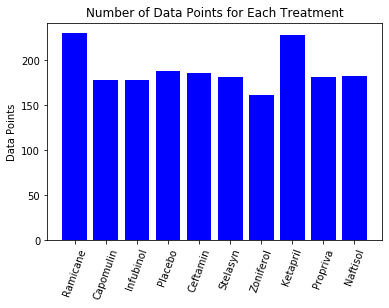

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_options = joined_data["Drug Regimen"].unique()
y_pos = np.arange(len(drug_options))

plt.bar(y_pos, counts_per_drug, color="b", align="center")
plt.xticks(y_pos, drug_options, rotation=70)
plt.ylabel('Data Points')
plt.title('Number of Data Points for Each Treatment')

plt.show()

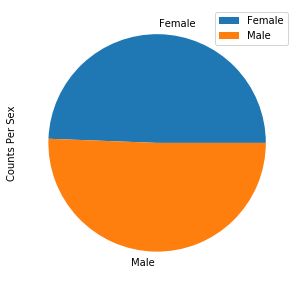

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

grouped_by_sex = joined_data.groupby(["Sex"])
counts_per_sex = grouped_by_sex['Sex'].count()

sex_df = pd.DataFrame({"Counts Per Sex": counts_per_sex})
sex_df.plot.pie(y='Counts Per Sex', figsize=(5, 5))

([<matplotlib.patches.Wedge at 0x1a24e232e8>,
 [Text(-0.7887477729166416, -0.904365496201087, 'Male'),
  Text(0.723018791840255, 0.8290017048509963, 'Female')],
 [Text(-0.4601028675347076, -0.527546539450634, '49.4%'),
  Text(0.39437388645832083, 0.4521827481005434, '50.6%')])

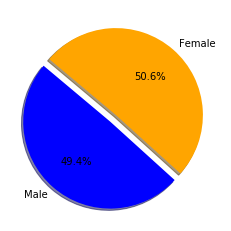

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(counts_per_sex, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.

#Determine most promising treatments
all_grouped = joined_data.groupby(["Drug Regimen"])
all_full = all_grouped[["Tumor Volume (mm3)"]]
all_last = all_full.last()
all_last_values = all_last['Tumor Volume (mm3)']

print(all_last_values)

#Isolate final tumor volume for all mice given Ramicane
ramicane_only_df = joined_data.loc[(joined_data["Drug Regimen"] == "Ramicane")]
ramicane_grouped = ramicane_only_df.groupby(["Mouse ID", "Drug Regimen"])
ramicane_full = ramicane_grouped[["Tumor Volume (mm3)"]]
ramicane_last = ramicane_full.last()
ramicane_values = ramicane_last['Tumor Volume (mm3)']

ramicane_quartiles = ramicane_values.quantile([.25,.5,.75])
lowerq = ramicane_quartiles[0.25]
upperq = ramicane_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

for x in ramicane_values:
    if x > upper_bound or x < lower_bound:
        print(f"{x} is a potential outlier")


#Isolate final tumor volume for all mice given Capomulin
capomulin_only_df = joined_data.loc[(joined_data["Drug Regimen"] == "Capomulin")]
capomulin_grouped = capomulin_only_df.groupby(["Mouse ID", "Drug Regimen"])
capomulin_full = capomulin_grouped[["Tumor Volume (mm3)"]]
capomulin_last = capomulin_full.last()
capomulin_values = capomulin_last['Tumor Volume (mm3)']
capomulin_quartiles = capomulin_values.quantile([.25,.5,.75])
lowerq = capomulin_quartiles[0.25]
upperq = capomulin_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

for x in capomulin_values:
    if x > upper_bound or x < lower_bound:
        print(f"{x} is a potential outlier")

#Isolate final tumor volume for all mice given Infubinol
infubinol_only_df = joined_data.loc[(joined_data["Drug Regimen"] == "Infubinol")]
infubinol_grouped = infubinol_only_df.groupby(["Mouse ID", "Drug Regimen"])
infubinol_full = infubinol_grouped[["Tumor Volume (mm3)"]]
infubinol_last = infubinol_full.last()
infubinol_values = infubinol_last['Tumor Volume (mm3)']
infubinol_quartiles = infubinol_values.quantile([.25,.5,.75])
lowerq = infubinol_quartiles[0.25]
upperq = infubinol_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

for x in infubinol_values:
    if x > upper_bound or x < lower_bound:
        print(f"{x} is a potential outlier for Infubinol")

#Isolate final tumor volume for all mice given Ceftamin
ceftamin_only_df = joined_data.loc[(joined_data["Drug Regimen"] == "Ceftamin")]
ceftamin_grouped = ceftamin_only_df.groupby(["Mouse ID", "Drug Regimen"])
ceftamin_full = ceftamin_grouped[["Tumor Volume (mm3)"]]
ceftamin_last = ceftamin_full.last()
ceftamin_values = ceftamin_last['Tumor Volume (mm3)']
ceftamin_quartiles = infubinol_values.quantile([.25,.5,.75])
lowerq = ceftamin_quartiles[0.25]
upperq = ceftamin_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

for x in ceftamin_values:
    if x > upper_bound or x < lower_bound:
        print(f"{x} is a potential outlier for Ceftamin")


Drug Regimen
Capomulin    46.539206
Ceftamin     64.729837
Infubinol    62.754451
Ketapril     62.909441
Naftisol     73.867845
Placebo      66.842635
Propriva     48.710661
Ramicane     44.183451
Stelasyn     45.934712
Zoniferol    48.077646
Name: Tumor Volume (mm3), dtype: float64
36.321345799999996 is a potential outlier for Infubinol


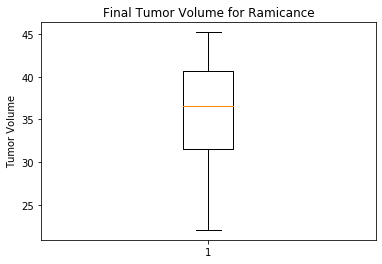

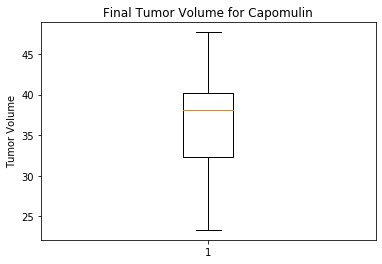

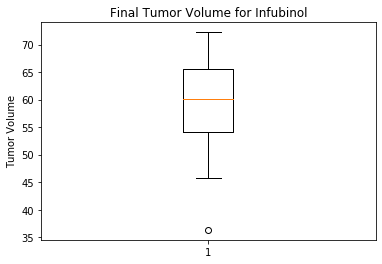

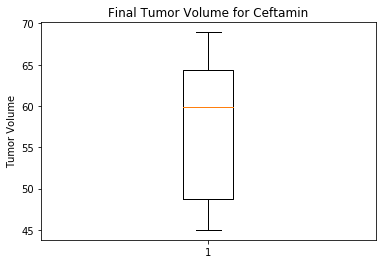

In [93]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Ramicance')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(ramicane_values)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Capomulin')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(capomulin_values)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Infubinol')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(infubinol_values)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Ceftamin')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(ceftamin_values)
plt.show()

## Line and scatter plots

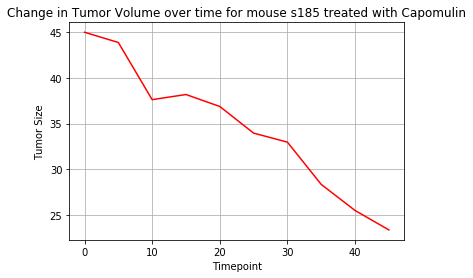

In [121]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

ceftamin_only_df = joined_data.loc[(joined_data["Drug Regimen"] == "Capomulin")]
mouse_s185 = ceftamin_only_df.loc[(ceftamin_only_df["Mouse ID"] == "s185")]

time = mouse_s185['Timepoint']
tumor_volume = mouse_s185['Tumor Volume (mm3)']

plt.plot(time, tumor_volume, color="red", label="Danger Drop")
plt.title("Change in Tumor Volume over time for mouse s185 treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Size")
plt.grid()
plt.show()

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen